# Notebook 02: Creating a baseline model

This notebook will generate a simple baseline model as benchmark for further machine learning and modeling.
In the end we will decide for a evaluation metric and baseline model to further evaluate and compare with our final machine learning model.

## Import Libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns
from sklearn.dummy import DummyClassifier
import warnings
warnings.simplefilter('ignore')


## Load data and inital check of data (info, decsribe)

In [56]:
#importing data
df = pd.read_csv('data/train.csv')
df.head()

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_statue_mode,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,delta_index_mean,months_number_mean,counter_type_mode
0,60,11,101,0.0,35.0,352.400000,10.571429,0.000000,0.000000,11.0,1335667.0,0,203.685714,6.971429,1.0,362.971429,4.628571,0
1,69,11,107,0.0,37.0,557.540541,0.000000,0.000000,0.000000,11.0,678902.0,0,203.000000,7.216216,1.0,557.540541,4.324324,0
2,62,11,301,0.0,18.0,798.611111,37.888889,0.000000,0.000000,11.0,572765.0,0,203.222222,7.055556,1.0,836.500000,6.444444,0
3,69,11,105,0.0,20.0,1.200000,0.000000,0.000000,0.000000,11.0,2078.0,0,413.000000,6.150000,1.0,1.200000,4.200000,0
4,62,11,303,0.0,14.0,663.714286,104.857143,117.357143,36.714286,11.0,19575.0,0,207.000000,8.857143,1.0,922.642857,3.714286,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    135493 non-null  int64  
 1   client_catg                135493 non-null  int64  
 2   region                     135493 non-null  int64  
 3   target                     135493 non-null  float64
 4   1transactions_count        128364 non-null  float64
 5   consommation_level_1_mean  128364 non-null  float64
 6   consommation_level_2_mean  128364 non-null  float64
 7   consommation_level_3_mean  128364 non-null  float64
 8   consommation_level_4_mean  128364 non-null  float64
 9   tarif_type_mean            128364 non-null  float64
 10  counter_number_mean        128364 non-null  float64
 11  counter_statue_mode        128364 non-null  object 
 12  counter_code_mean          128364 non-null  float64
 13  reading_remarque_mean      12

In [58]:
df.describe()

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,delta_index_mean,months_number_mean
count,135493.000000,135493.000000,135493.000000,135493.000000,128364.000000,128364.000000,128364.000000,128364.000000,128364.000000,128364.000000,1.283640e+05,128364.000000,128364.000000,128364.000000,128364.000000,128364.000000
mean,63.511222,11.512506,206.159809,0.055841,34.703164,418.212156,119.826684,29.168974,77.157651,17.398668,7.292914e+11,197.703351,7.458997,1.001319,626.797729,32.558491
std,3.354400,4.423761,104.207044,0.229614,25.805131,373.130103,760.000297,161.464828,836.333783,7.063041,3.889484e+12,95.210159,1.421419,0.183572,3073.537881,2799.427362
min,60.000000,11.000000,101.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.777778,0.000000e+00,0.000000,6.000000,0.888889,-69134.000000,1.000000
25%,62.000000,11.000000,103.000000,0.000000,13.000000,223.469824,0.000000,0.000000,0.000000,11.000000,2.682476e+05,112.735294,6.884615,1.000000,234.923077,4.000000
50%,62.000000,11.000000,107.000000,0.000000,32.000000,360.179487,6.929683,0.000000,0.000000,11.000000,6.786620e+05,203.000000,7.333333,1.000000,393.930288,4.210526
75%,69.000000,11.000000,307.000000,0.000000,52.000000,542.885013,67.829762,5.692700,0.000000,25.295775,2.731990e+06,207.000000,8.000000,1.000000,639.076307,4.666667
max,69.000000,51.000000,399.000000,1.000000,439.000000,34024.000000,115683.000000,38526.857143,79179.777778,45.000000,2.739110e+13,600.000000,413.000000,40.000000,596828.687500,602244.750000


## EDA

### Checking Pairplots to detect correlation between features and target

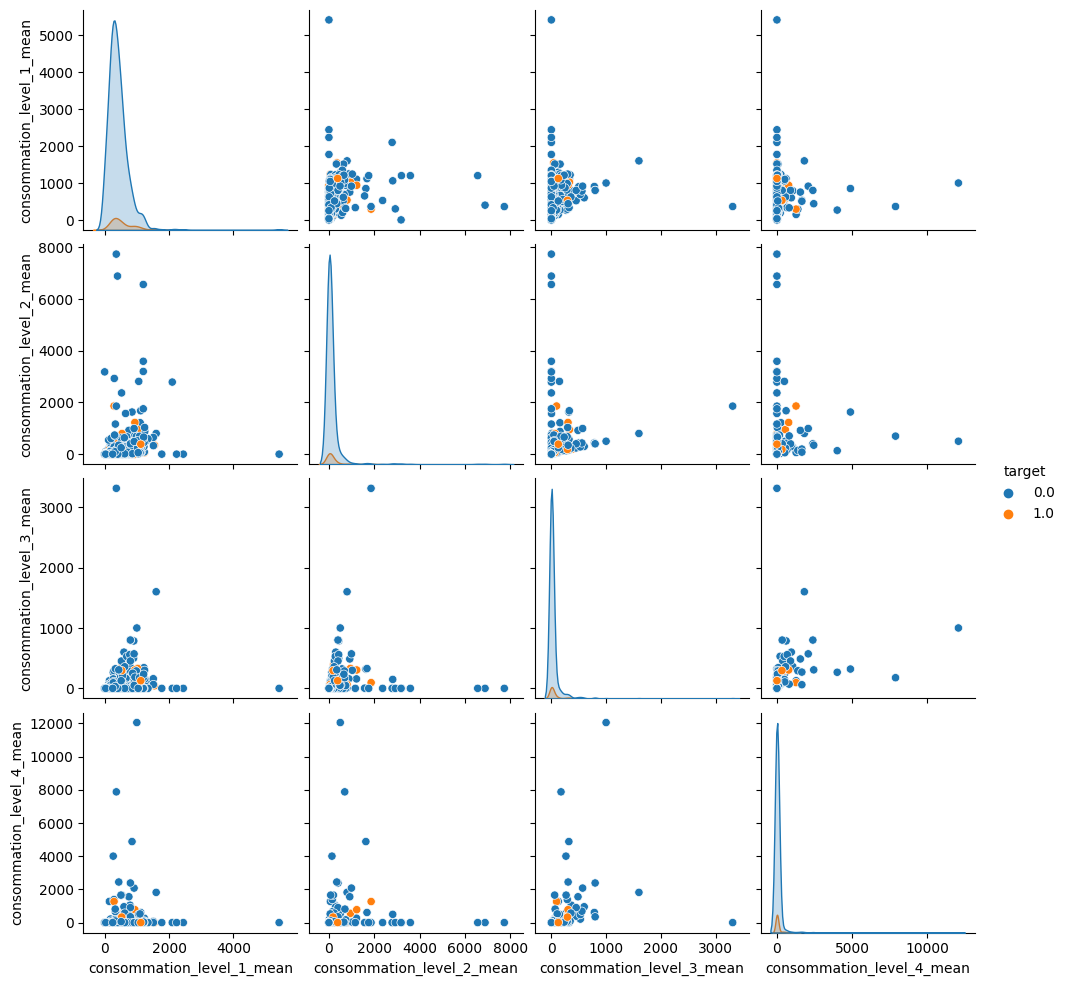

In [59]:
#Creating a pairplot to check correlation between consumption levels in first 1000 data points
sns.pairplot(df[['consommation_level_1_mean', 'consommation_level_2_mean', 'consommation_level_3_mean', 'consommation_level_4_mean', 'target']].head(1000), hue='target');

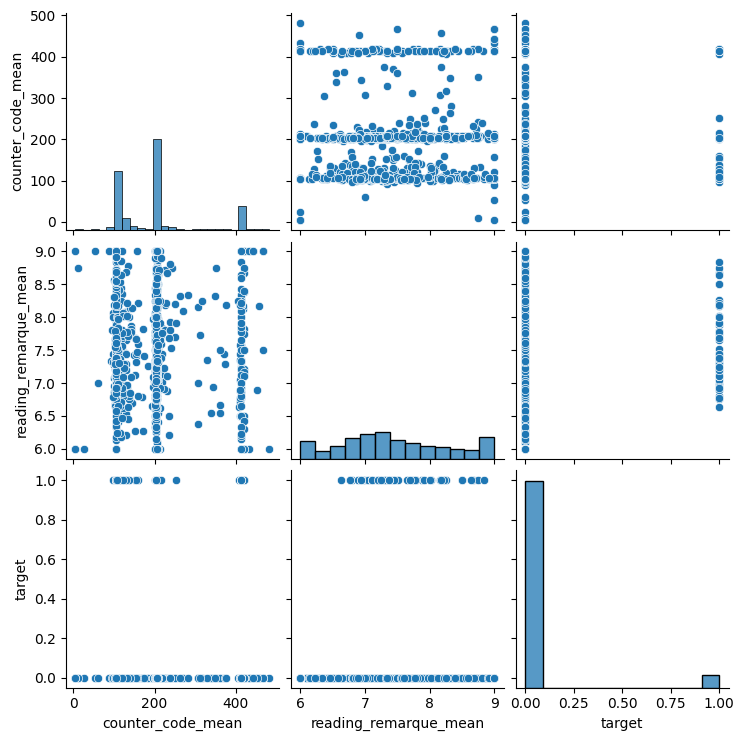

In [60]:
#Pairplot to check correlation between counter information and target
sns.pairplot(df[['counter_code_mean', 'reading_remarque_mean', 'target']].head(1000));

### Histograms and Boxplots

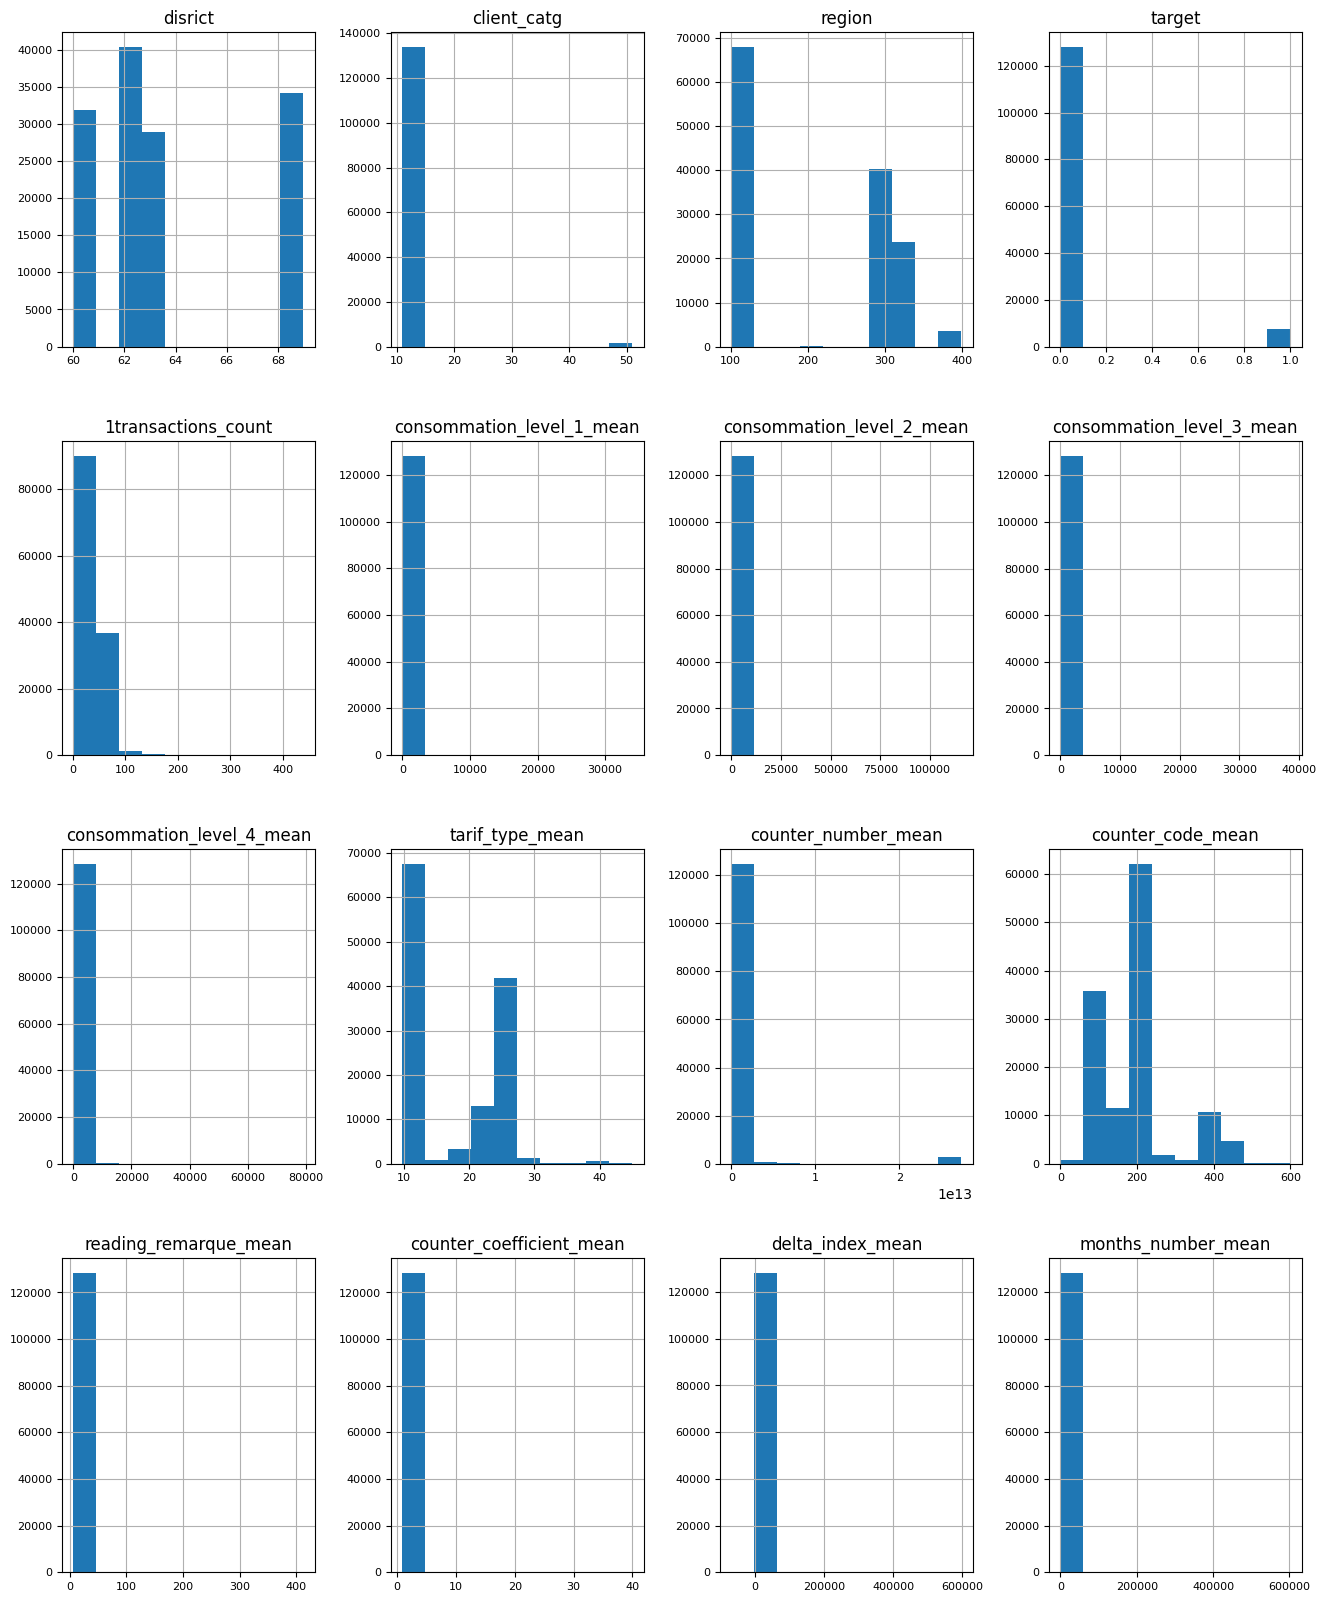

In [61]:
#Plotting histograms for all columns to check distributions and detect outliers
df.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

There seems to be a lot of outliers in the right region of the histograms (very high values), so that we should also look at the boxplots. 

In [62]:
def boxplot_matrix(df, nrows, ncols): 
    """function to plot a matrix of boxplots with nrows and ncols 

    Args:
        df (_type_): _description_
        nrows (_type_): _description_
        ncols (_type_): _description_
    """
    fig, ax = plt.subplots(nrows, ncols, figsize=(20,10)) # create subplots on n rows and n columns
    plt.suptitle('Distribution of numeric columns', fontsize=20)
    fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots
    feature = 0
    for row in list(range(nrows)): 
        for col in list(range(ncols)): 
            if feature >= df.shape[1]: 
                break
            else: 
                ax[row][col].boxplot(x = df.iloc[:,feature]) # creates boxplot for number of views
                ax[row][col].set_xticklabels(labels=["Views"]) # sets the label for the ticks on the x-axis
                #ax[row][col].set_ylim(0,2000000) # limits the y-axis values from 0 to 2000000 
                ax[row][col].set_title("Distribution of views count", fontsize = 15); # sets title for subplot
                plt.yscale("log") 
                feature += 1

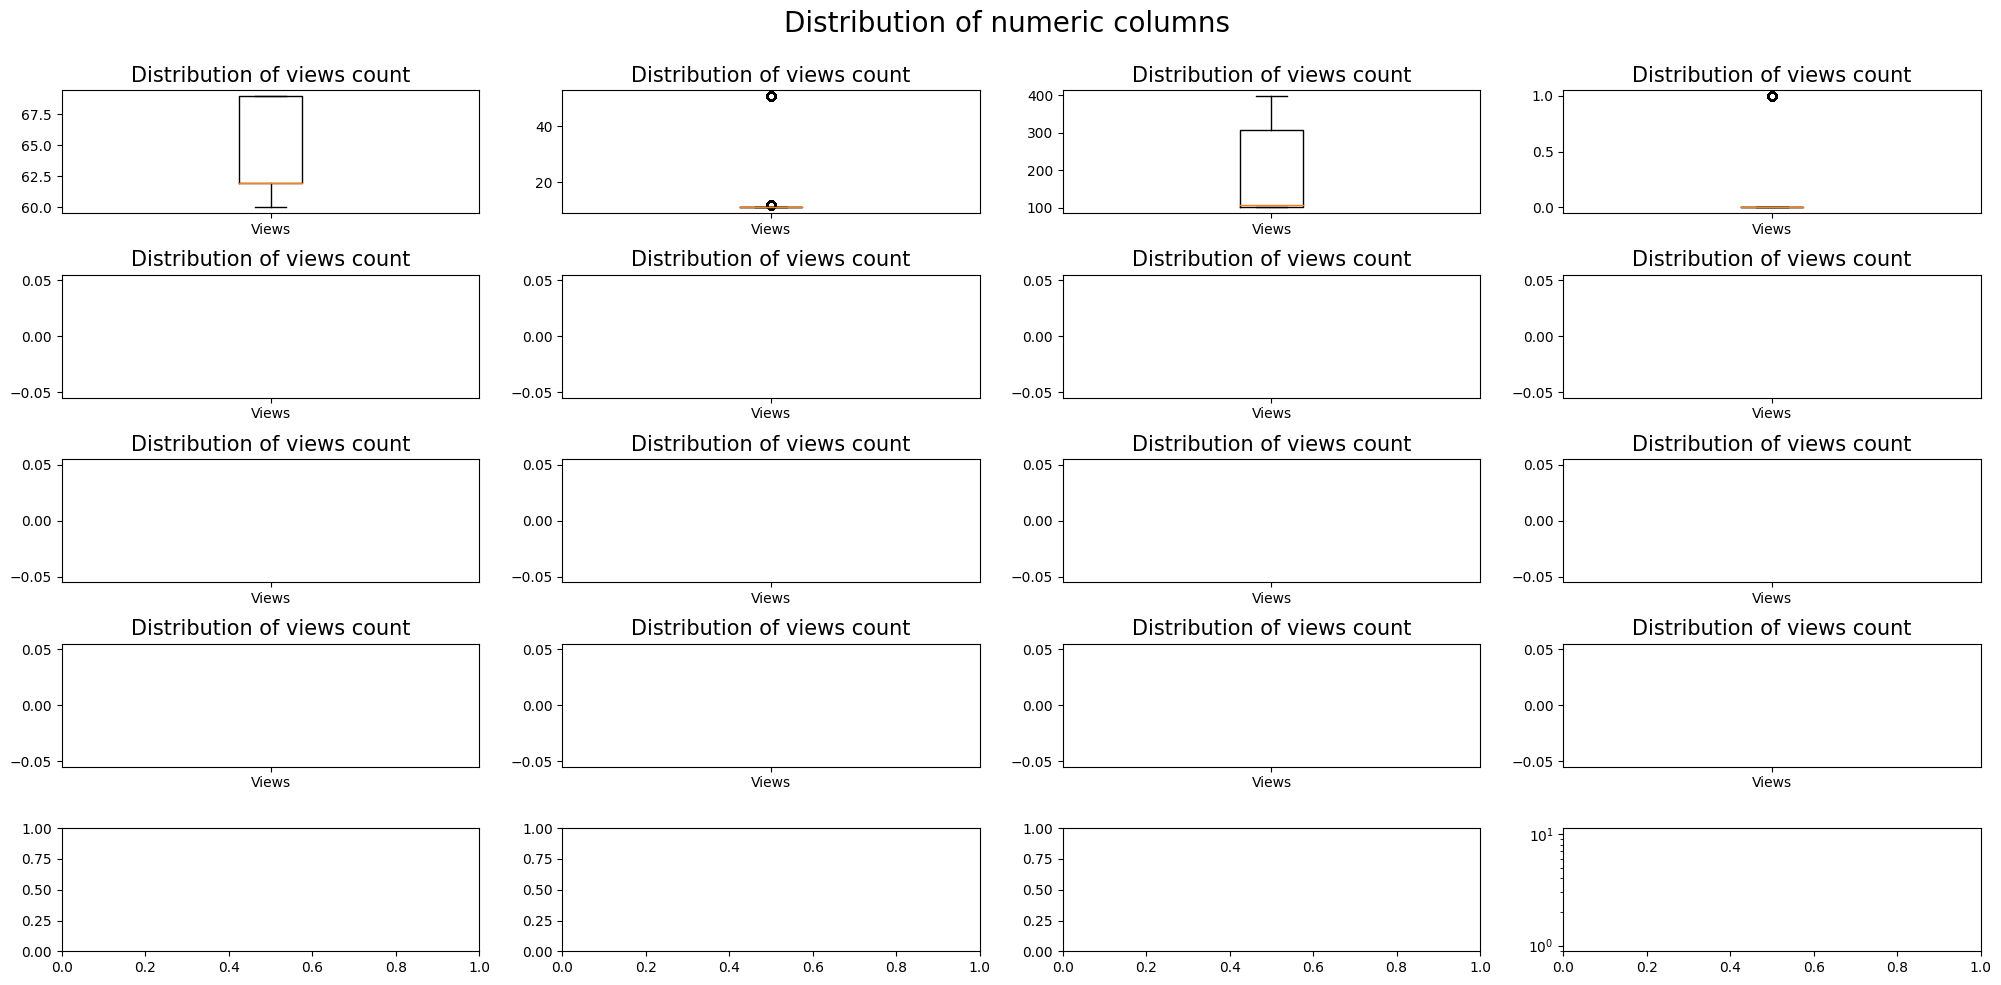

In [63]:
# plotting boxplots for each column to get a better understanding of data distribution and outliers for each column
df_boxplots = df.drop(['counter_statue_mode', 'counter_type_mode'], axis=1)
boxplot_matrix(df_boxplots, 5, 4)

We see a lot of outliers in our data (according to the classical 1.5 IQR definition), but decide to keep them for the moment, because they might be the actually interesting (crucial) ones, when we talk about fraud cases. 

### Correlation Matrix

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,delta_index_mean,months_number_mean
disrict,1.00,0.03,-0.31,0.05,-0.03,0.01,-0.02,0.02,0.01,0.15,0.01,-0.01,0.04,-0.01,-0.00,-0.01
client_catg,0.03,1.00,-0.04,0.05,0.12,0.03,0.16,0.08,0.25,-0.02,-0.01,0.18,0.04,0.05,0.16,0.07
region,-0.31,-0.04,1.00,0.01,0.05,-0.05,-0.06,-0.06,-0.05,-0.12,0.05,-0.05,0.01,0.00,-0.03,-0.00
target,0.05,0.05,0.01,1.00,0.12,0.02,0.01,0.03,0.01,0.05,-0.02,-0.03,0.00,-0.00,0.01,0.00
1transactions_count,-0.03,0.12,0.05,0.12,1.00,-0.03,-0.02,-0.07,-0.04,0.53,-0.21,-0.36,-0.13,0.01,-0.02,0.01
consommation_level_1_mean,0.01,0.03,-0.05,0.02,-0.03,1.00,0.17,0.21,0.08,-0.09,-0.05,0.24,0.09,0.01,0.15,-0.01
consommation_level_2_mean,-0.02,0.16,-0.06,0.01,-0.02,0.17,1.00,0.10,0.10,-0.07,-0.02,0.20,-0.00,0.04,0.25,0.04
consommation_level_3_mean,0.02,0.08,-0.06,0.03,-0.07,0.21,0.10,1.00,0.26,-0.07,0.01,0.21,0.09,0.01,0.19,0.09
consommation_level_4_mean,0.01,0.25,-0.05,0.01,-0.04,0.08,0.10,0.26,1.00,-0.05,0.01,0.18,0.06,0.01,0.30,0.00
tarif_type_mean,0.15,-0.02,-0.12,0.05,0.53,-0.09,-0.07,-0.07,-0.05,1.00,-0.16,-0.63,-0.04,-0.01,-0.03,0.02


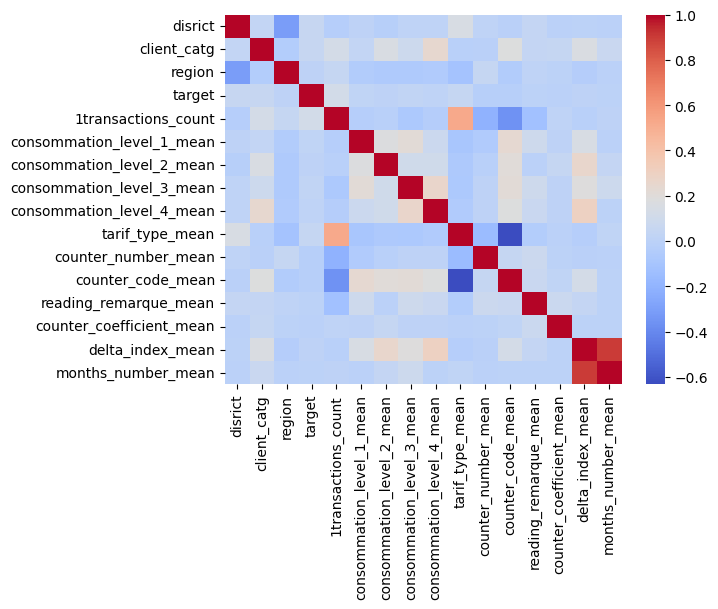

In [64]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
corr_matrix.round(2)

### Conclusions about correlation and data distributions

* delta index is highly correlated with the number of months
* target is not really correlated with any other single feature (we need a more complex model later) 
* region and disrict are a bit correlated (obvious)
* client_catg has several light correlations with some other features
* increased transactions correlate with increased tarif types
* correlation between counter code and transaction maybe random
* strong negative correlation between counter codes and tarif types (maybe old counters / customers have higher tarif types)

## Testing Baseline Models

As baseline model we are using the Dummy Classifier. We will test different strategies implemented in the Dummy Classifier to understand their impact and the outcome of the evaluation metrics.
For future evaluation of our model we will use the f1 score to have a metric which evaluates recall and precision equally.

### Data Preparation for Dummy Classification

In [65]:
# Defining features and target and spliting into test and train set
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


### Dummy Classifier

#### Strategy: most frequent

In [66]:
# most frequent - Dummy Classifer
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred=dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     25586
         1.0       0.00      0.00      0.00      1513

    accuracy                           0.94     27099
   macro avg       0.47      0.50      0.49     27099
weighted avg       0.89      0.94      0.92     27099



#### Strategy: prior

In [67]:
dummy_clf = DummyClassifier(strategy="prior")
dummy_clf.fit(X_train, y_train)
y_pred=dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     25586
         1.0       0.00      0.00      0.00      1513

    accuracy                           0.94     27099
   macro avg       0.47      0.50      0.49     27099
weighted avg       0.89      0.94      0.92     27099



#### Strategy: uniform

In [68]:
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred=dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.50      0.65     25586
         1.0       0.05      0.48      0.10      1513

    accuracy                           0.50     27099
   macro avg       0.50      0.49      0.37     27099
weighted avg       0.89      0.50      0.62     27099



#### Strategy: stratified

In [69]:
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred=dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))

report = classification_report(y_test, y_pred)
classification_report(y_test, y_pred, output_dict=True)['1.0']['f1-score']

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     25586
         1.0       0.05      0.05      0.05      1513

    accuracy                           0.89     27099
   macro avg       0.50      0.50      0.50     27099
weighted avg       0.89      0.89      0.89     27099



#### Strategy: constant

In [83]:
dummy_clf = DummyClassifier(strategy="constant", constant=1)
dummy_clf.fit(X_train, y_train)
y_pred=dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     25586
         1.0       0.06      1.00      0.11      1513

    accuracy                           0.06     27099
   macro avg       0.03      0.50      0.05     27099
weighted avg       0.00      0.06      0.01     27099



### Checking proportion of fraudulent clients to decide for baseline model

In [71]:
# mean value of target shwoing imbalanced dataset and proportion used for stratified baseline model
print(f'The proportion of fraudulent clients is {df.target.mean().round(4) *100}%.')

The proportion of fraudulent clients is 5.58%.


### Conclusion for baseline model

For our baseline model we tested all strategies in the dummy classifier. 
The most appropriate for our dataset is "stratified". 
Our model should perform better than the "stratified" f1 score of 0.05. 

### Milestone 1 - Summary:

* Value of Product:
    * Find fraudulent clients, safe money, avoid reputation damage and prevent money laundering.
* Prediction:
    * Client is fraudulent
* Evaluation Metric:
    * f1-score
* Baseline Model:
    * Based on experience in the past we expect a proportion of 5.58% fraudulent clients. 
* Score:
    * f1-score = 0.05